In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [12]:
df_aerolinea = pd.read_csv('../files/aerolinea_limpio.csv', index_col=0)

In [13]:
df_aerolinea.head()

,Loyalty_Number,Province,City,Postal_Code,Gender,Education,Salary_$,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Date,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Date
0,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016-02,0,0,0,0,0,0,0,2017-01
1,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016-02,3,0,3,2823,282,0,0,2017-02
2,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016-02,0,0,0,0,0,0,0,2017-03
3,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016-02,0,0,0,0,0,0,0,2017-04
4,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016-02,6,2,8,3352,335,465,38,2018-10


## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

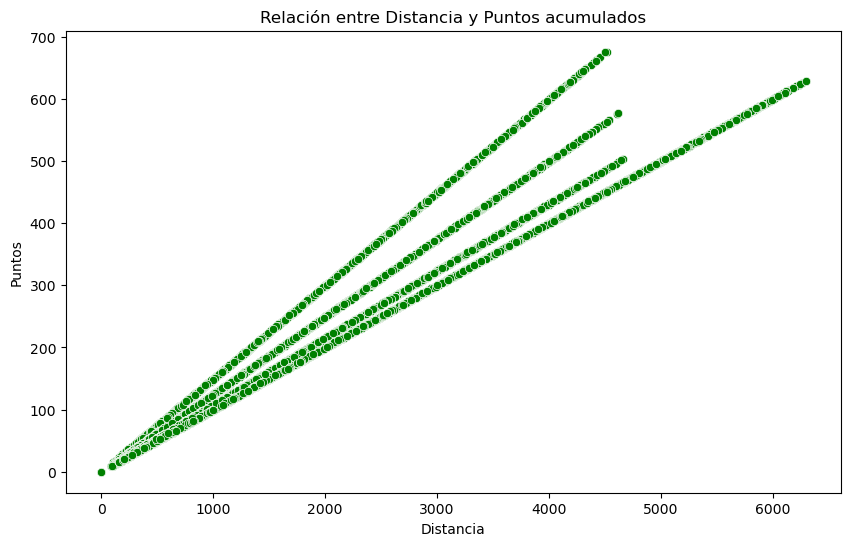

In [14]:
# Crear gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_aerolinea, x='Distance', y='Points_Accumulated', color = 'green')
plt.title('Relación entre Distancia y Puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos')
plt.show()

## CONCLUSIÓN:

#### Existe una fuerte correlación entre ambas variables ya demás observamos un patrón de comportamiento de los datos en 4 líneas de representación de datos diferenciadas.

## INVESTIGACION

In [15]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date'],
      dtype='object')

In [16]:
df_numericas = df_aerolinea.select_dtypes(include='number')

In [17]:
df_numericas.head()

,Loyalty_Number,Salary_$,CLV,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,480934,83236,3839.14,0,0,0,0,0,0,0
1,480934,83236,3839.14,3,0,3,2823,282,0,0
2,480934,83236,3839.14,0,0,0,0,0,0,0
3,480934,83236,3839.14,0,0,0,0,0,0,0
4,480934,83236,3839.14,6,2,8,3352,335,465,38


In [18]:
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty_Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary_$,403760.0,79368.508049,30008.343707,9081.00,63901.00,79359.00,82940.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Flights_Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights_with_Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total_Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points_Accumulated,403760.0,124.237924,146.675448,0.00,0.00,53.00,240.00,676.00
Points_Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar_Cost_Points_Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


### Calculamos la correlación de Person

/home/sara-arranz/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


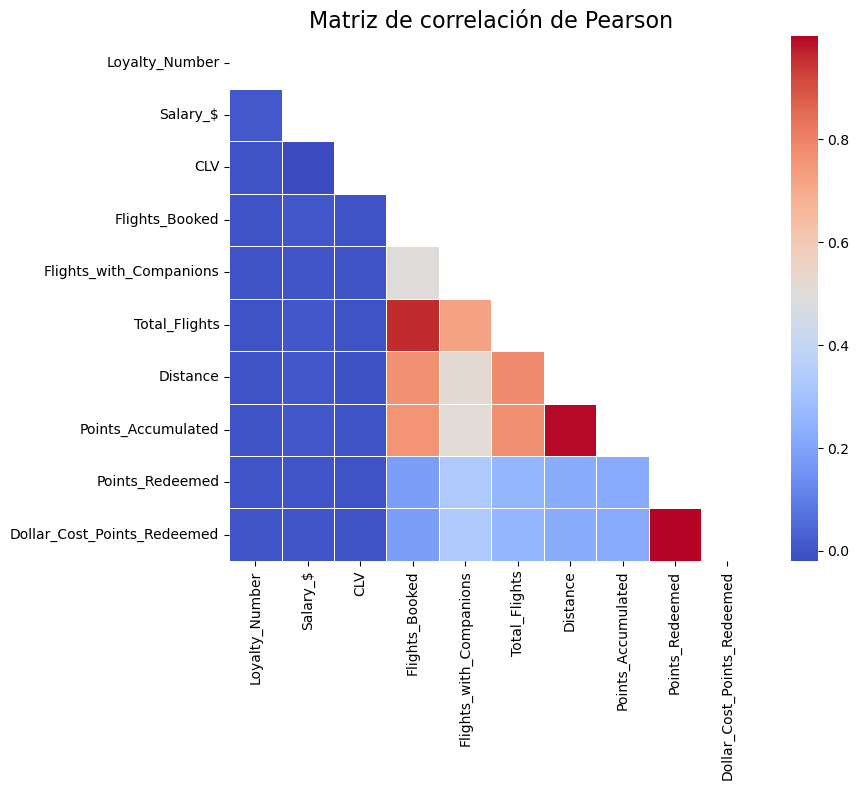

In [27]:
df_correlacion = df_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, square=True)

# Añadir título y ajustar el diseño
plt.title('Matriz de correlación de Pearson', fontsize=16)
plt.tight_layout()
plt.show()

Los cuadros en color rojo oscuro son los que presentan una mayor correlación:

Total_Flights y Flights_Booked

Distance y y Points_Acumulated

Points_Redeemed y Dollar_Cost_Points_Redeemed

### Método de correlación de Kendall

In [28]:
df_correlaciones2 = df_numericas.corr(method="kendall")
df_correlaciones2

,Loyalty_Number,Salary_$,CLV,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty_Number,1.000000,0.001929,-0.004951,-0.001721,-0.001607,-0.001898,-0.001516,-0.001472,0.000168,0.000168
Salary_$,0.001929,1.000000,-0.016632,0.006755,0.003814,0.006715,0.007402,0.007406,0.002179,0.002180
CLV,-0.004951,-0.016632,1.000000,-0.000036,-0.000573,-0.000162,-0.000569,0.001651,0.000074,0.000076
Flights_Booked,-0.001721,0.006755,-0.000036,1.000000,0.492178,0.931263,0.740474,0.736993,0.195394,0.195475
Flights_with_Companions,-0.001607,0.003814,-0.000573,0.492178,1.000000,0.595909,0.493790,0.491532,0.371903,0.372058
Total_Flights,-0.001898,0.006715,-0.000162,0.931263,0.595909,1.000000,0.745852,0.741882,0.230939,0.231035
Distance,-0.001516,0.007402,-0.000569,0.740474,0.493790,0.745852,1.000000,0.982900,0.207015,0.207098
Points_Accumulated,-0.001472,0.007406,0.001651,0.736993,0.491532,0.741882,0.982900,1.000000,0.206955,0.207039
Points_Redeemed,0.000168,0.002179,0.000074,0.195394,0.371903,0.230939,0.207015,0.206955,1.000000,0.999583
Dollar_Cost_Points_Redeemed,0.000168,0.002180,0.000076,0.195475,0.372058,0.231035,0.207098,0.207039,0.999583,1.000000


In [29]:
df_estudio = df_correlaciones2.where(df_correlaciones2 > 0.5)

In [30]:
df_estudio

,Loyalty_Number,Salary_$,CLV,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty_Number,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary_$,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flights_Booked,NaN,NaN,NaN,1.000000,NaN,0.931263,0.740474,0.736993,NaN,NaN
Flights_with_Companions,NaN,NaN,NaN,NaN,1.000000,0.595909,NaN,NaN,NaN,NaN
Total_Flights,NaN,NaN,NaN,0.931263,0.595909,1.000000,0.745852,0.741882,NaN,NaN
Distance,NaN,NaN,NaN,0.740474,NaN,0.745852,1.000000,0.982900,NaN,NaN
Points_Accumulated,NaN,NaN,NaN,0.736993,NaN,0.741882,0.982900,1.000000,NaN,NaN
Points_Redeemed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999583
Dollar_Cost_Points_Redeemed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999583,1.000000


Si revisamos estos datos nuestra hipótesis debe centrarse en las columnas de Total_Flights y Points_Acumulated

<Axes: xlabel='Distance', ylabel='Points_Accumulated'>

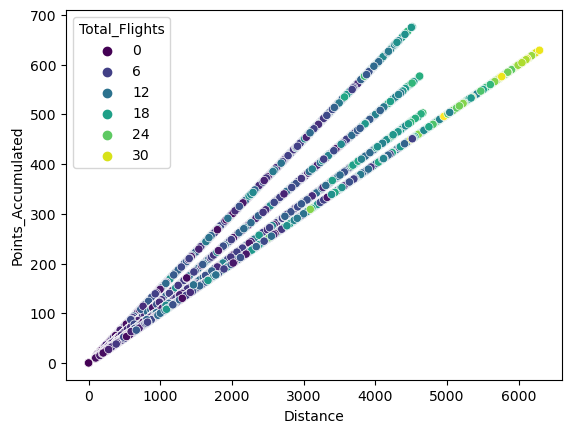

In [ ]:
sns.scatterplot(data=df_aerolinea, x='Distance', y='Points_Accumulated', hue='Total_Flights', palette='viridis')

### Todos los datos siguen un mismo patrón

Identificar y Filtrar los Grupos de Clientes

Como vemos que los puntos se agrupan en 4 líneas claras, es probable que haya grupos subyacentes de clientes que se comportan de manera similar. 

Vamos a intentar segmentar los datos según características específicas, como:

- Clientes con un número de Total_Flights.

- Clientes con diferentes valores de Puntos acumulados.

- Comportamiento en función del Tipo de fidelidad o Estado de cliente.

Histograma para ver la distribución de puntos acumulados y distancias:

    Histograma de Puntos Acumulados:

/home/sara-arranz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


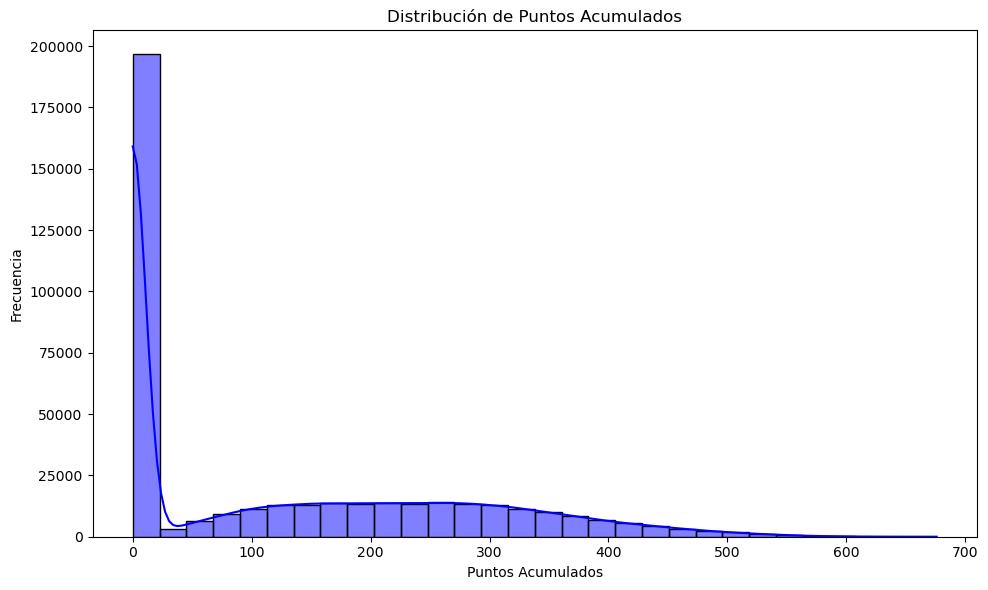

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_aerolinea['Points_Accumulated'], kde=True, color='blue', bins=30)
plt.title('Distribución de Puntos Acumulados')
plt.xlabel('Puntos Acumulados')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

    Histograma de Distancia:

/home/sara-arranz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


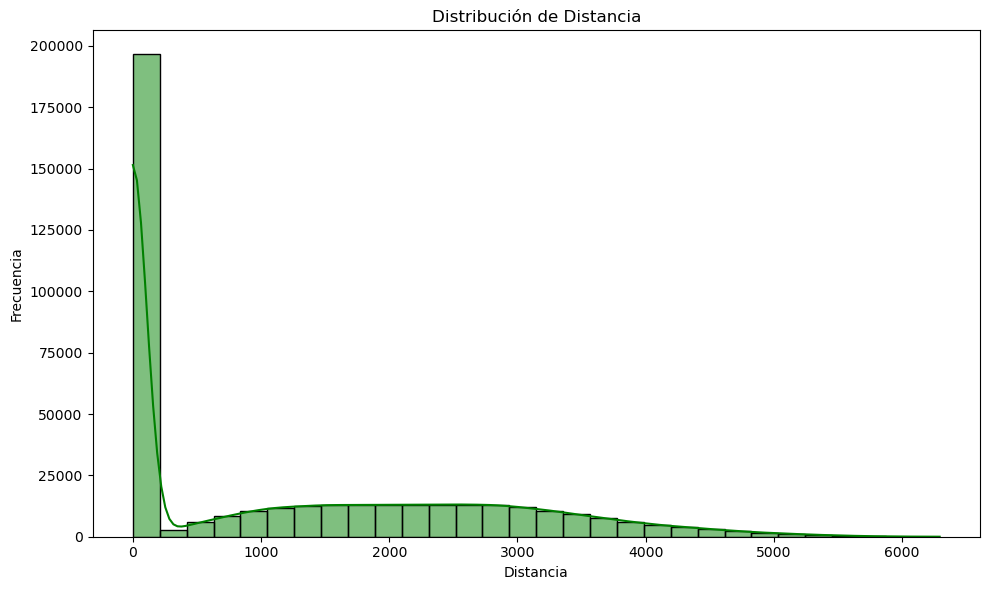

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_aerolinea['Distance'], kde=True, color='green', bins=30)
plt.title('Distribución de Distancia')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

- Comportamiento en función del Tipo de fidelidad o Estado de cliente.

### Gráfico de Dispersión con hue para identificar los segmentos de fidelidad (Loyalty_Card):

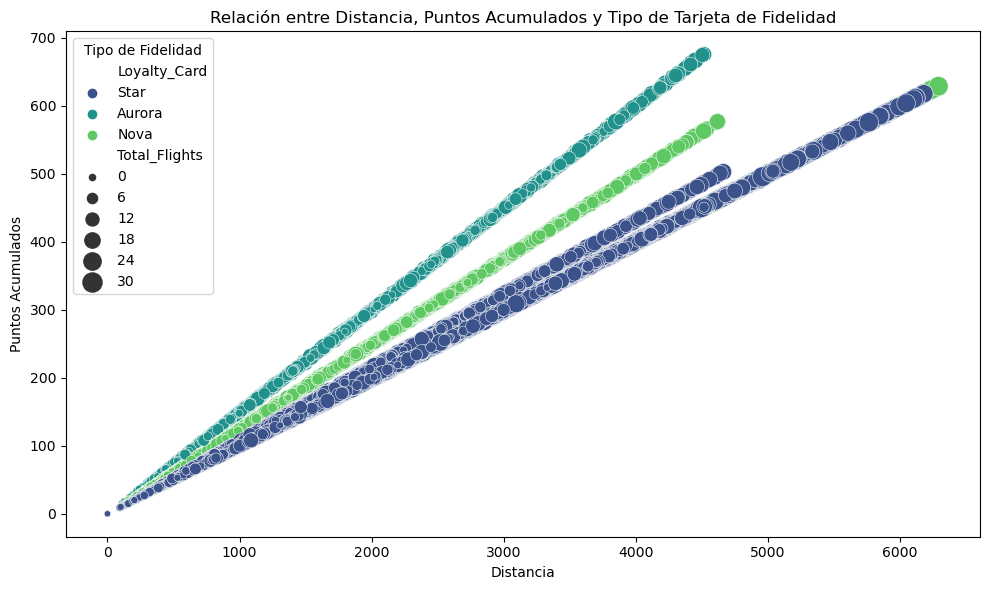

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_aerolinea, x='Distance', y='Points_Accumulated', hue='Loyalty_Card', palette='viridis', size='Total_Flights', sizes=(20, 200))
plt.title('Relación entre Distancia, Puntos Acumulados y Tipo de Tarjeta de Fidelidad')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.legend(title='Tipo de Fidelidad')
plt.tight_layout()
plt.show()

Lo que estamos observando sugiere que el patrón de las 4 líneas está relacionado con los tipos de tarjetas de fidelidad. Es probable que haya una distribución estructurada de los datos basada en estos 3 tipos de tarjetas, y dentro de uno de ellos, parece que hay una doble línea, lo que podría indicar dos grupos distintos de clientes o comportamientos dentro de ese tipo de tarjeta. 

Esto puede suceder por varias razones, como diferentes características en la manera en que los puntos son acumulados o canjeados según el tipo de tarjeta de fidelidad.

## Conclusión

El patrón de los puntos dentro de las cuatro líneas puede indicar que hay niveles o categorías específicas de acumulación de puntos que se alcanzan a ciertas distancias. 

### HIPÓTESIS

#### Estructura de Recompensas:

Es posible que el programa de fidelidad tenga umbrales definidos para la acumulación de puntos. Por ejemplo, cada vez que se alcanza una cierta distancia, se otorgan puntos adicionales, creando estos niveles visibles en la gráfica.

#### Segmentación de Datos:

Los datos podrían estar segmentados en intervalos específicos de distancia, y cada segmento tiene una cantidad fija de puntos acumulados. 

#### Promociones o Bonificaciones:

Podría haber promociones o bonificaciones que se activan a ciertas distancias, lo que resulta en saltos en la acumulación de puntos. Por ejemplo, una bonificación extra por cada 100 km recorridos.

## Interpretación

Si cada línea representa un umbral de distancia, los puntos acumulados podrían aumentar significativamente al cruzar cada umbral. 
Esto explicaría por qué los puntos se agrupan en líneas en lugar de distribuirse de manera continua.